In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import umap
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [33]:
df = pd.read_csv('train.csv')

In [34]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,Id
0,0.896,0.691,1,-7.403,1,0.369,0.01180,0.000,0.0883,0.6650,...,spotify:track:1lKQIxQDnLKoFhNWwMFiho,https://api.spotify.com/v1/tracks/1lKQIxQDnLKo...,https://api.spotify.com/v1/audio-analysis/1lKQ...,152398,4,Underground Rap,First Day Out,NaN,NaN,6863
1,0.432,0.962,2,-5.834,1,0.130,0.00193,0.162,0.6300,0.1240,...,spotify:track:6xyHjM4VecIRZDUldiiBA5,https://api.spotify.com/v1/tracks/6xyHjM4VecIR...,https://api.spotify.com/v1/audio-analysis/6xyH...,219085,4,trance,NaN,8997.0,Uplifting | Trance,30452
2,0.686,0.692,0,-5.573,0,0.323,0.48200,0.000,0.1690,0.6490,...,spotify:track:1rZvU5sb2E8LuJTAqEdAiw,https://api.spotify.com/v1/tracks/1rZvU5sb2E8L...,https://api.spotify.com/v1/audio-analysis/1rZv...,269357,3,Underground Rap,Funky Ho'$,NaN,NaN,8111
3,0.441,0.891,7,-2.873,0,0.037,0.01770,0.815,0.1840,0.0353,...,spotify:track:1TDjiNBekgMInzoNZxYi0D,https://api.spotify.com/v1/tracks/1TDjiNBekgMI...,https://api.spotify.com/v1/audio-analysis/1TDj...,319851,4,dnb,NaN,15264.0,Liquid Drum & Bass,36665
4,0.376,0.876,4,-2.695,0,0.101,0.03450,0.000,0.1250,0.2500,...,spotify:track:79fspqGOIP7FInu1elXhVX,https://api.spotify.com/v1/tracks/79fspqGOIP7F...,https://api.spotify.com/v1/audio-analysis/79fs...,222442,4,Dark Trap,Miss U,NaN,NaN,4428


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33844 entries, 0 to 33843
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      33844 non-null  float64
 1   energy            33844 non-null  float64
 2   key               33844 non-null  int64  
 3   loudness          33844 non-null  float64
 4   mode              33844 non-null  int64  
 5   speechiness       33844 non-null  float64
 6   acousticness      33844 non-null  float64
 7   instrumentalness  33844 non-null  float64
 8   liveness          33844 non-null  float64
 9   valence           33844 non-null  float64
 10  tempo             33844 non-null  float64
 11  type              33844 non-null  object 
 12  id                33844 non-null  object 
 13  uri               33844 non-null  object 
 14  track_href        33844 non-null  object 
 15  analysis_url      33844 non-null  object 
 16  duration_ms       33844 non-null  int64 

A continuación, vemos un ejemplo de un características que es igual para todas las muestras del dataset

In [36]:
df['type'].unique()

array(['audio_features'], dtype=object)

In [37]:
df['genre'].unique()

array(['Underground Rap', 'trance', 'dnb', 'Dark Trap', 'RnB', 'Hiphop',
       'trap', 'Trap Metal', 'Pop', 'hardstyle', 'Emo', 'Rap',
       'techhouse', 'psytrance', 'techno'], dtype=object)

Vamos a calcular la sparcity

In [38]:
valores_totales = df.size
valores_nulos = df.isnull().sum().sum()
print(f'Los valores nulos son: {valores_nulos}')
print(f'Los valores totales son: {valores_totales}')

sparcity = valores_nulos/valores_totales

print(f'La sparcity es {sparcity}')


Los valores nulos son: 51031
Los valores totales son: 778412
La sparcity es 0.06555782798826329


Aunque parece que el % es bajo hay que tener en cuenta que como se observa en la información del dataset los 12805 nulos están concentrados en 3 características. Esto va a ser determinante a la hora de aplicar técnicas de feature selection o feature extraction.

Vamos a calcular los valores únicos en las columnas de tipo object ya que por lo que parece observarse hay columnas que parecen ID que no van a aportar nada a la predicción y van a complicar el cálculo

In [39]:
recuento_unicos = df.nunique()

print(recuento_unicos)

danceability          878
energy                891
key                    12
loudness            10880
mode                    2
speechiness          1430
acousticness         4478
instrumentalness     4500
liveness             1678
valence              1662
tempo               13649
type                    1
id                  29508
uri                 29508
track_href          29508
analysis_url        29508
duration_ms         22331
time_signature          4
genre                  15
song_name           12981
Unnamed: 0          16662
title                 132
Id                  33844
dtype: int64


In [40]:
duplicados_columnaid = df[df.duplicated(subset=['id'], keep=False)]

print(duplicados_columnaid['id'])

2        1rZvU5sb2E8LuJTAqEdAiw
10       5f5qZSlK1skd1zPqetGZfP
17       5esKpsrB3TbGHwFaAjIGMx
23       3yVuQVViVjSzFCFQN0I7Yv
24       21PmKbhk8SsEgIEfDCDjvw
                  ...          
33819    6o3QUC5oAE4g6WxRIFcZtb
33824    1QstbjmlSF0xMxGIdvhiGh
33826    34I0nBvoE0ZXmqbKiJ5BWS
33832    1uu9DbbAl8EtFtgax5lYkg
33840    0PCKaqffqRsFYxKy7uTLti
Name: id, Length: 7782, dtype: object


In [41]:
valor_texto = '1rZvU5sb2E8LuJTAqEdAiw'

filtro_texto = df[df['id'] == valor_texto]

print(filtro_texto)

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
2             0.686   0.692    0    -5.573     0        0.323         0.482   
19186         0.686   0.692    0    -5.573     0        0.323         0.482   

       instrumentalness  liveness  valence  ...  \
2                   0.0     0.169    0.649  ...   
19186               0.0     0.169    0.649  ...   

                                        uri  \
2      spotify:track:1rZvU5sb2E8LuJTAqEdAiw   
19186  spotify:track:1rZvU5sb2E8LuJTAqEdAiw   

                                              track_href  \
2      https://api.spotify.com/v1/tracks/1rZvU5sb2E8L...   
19186  https://api.spotify.com/v1/tracks/1rZvU5sb2E8L...   

                                            analysis_url duration_ms  \
2      https://api.spotify.com/v1/audio-analysis/1rZv...      269357   
19186  https://api.spotify.com/v1/audio-analysis/1rZv...      269357   

      time_signature            genre   song_name  Unnamed: 0 title 

In [42]:
valor_texto = '5f5qZSlK1skd1zPqetGZfP'

filtro_texto = df[df['id'] == valor_texto]

print(filtro_texto)

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
10             0.71    0.97   11    -2.958     0       0.0601       0.00731   
1593           0.71    0.97   11    -2.958     0       0.0601       0.00731   
30688          0.71    0.97   11    -2.958     0       0.0601       0.00731   

       instrumentalness  liveness  valence  ...  \
10               0.0147    0.0841    0.496  ...   
1593             0.0147    0.0841    0.496  ...   
30688            0.0147    0.0841    0.496  ...   

                                        uri  \
10     spotify:track:5f5qZSlK1skd1zPqetGZfP   
1593   spotify:track:5f5qZSlK1skd1zPqetGZfP   
30688  spotify:track:5f5qZSlK1skd1zPqetGZfP   

                                              track_href  \
10     https://api.spotify.com/v1/tracks/5f5qZSlK1skd...   
1593   https://api.spotify.com/v1/tracks/5f5qZSlK1skd...   
30688  https://api.spotify.com/v1/tracks/5f5qZSlK1skd...   

                                            anal

Como observamos hay muchos valores duplicados que tienen las mismos id únicos que identifican la canción. Procedemos a eliminarlos

In [43]:
df = df.drop_duplicates(subset='id')
df = df.reset_index(drop=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29508 entries, 0 to 29507
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29508 non-null  float64
 1   energy            29508 non-null  float64
 2   key               29508 non-null  int64  
 3   loudness          29508 non-null  float64
 4   mode              29508 non-null  int64  
 5   speechiness       29508 non-null  float64
 6   acousticness      29508 non-null  float64
 7   instrumentalness  29508 non-null  float64
 8   liveness          29508 non-null  float64
 9   valence           29508 non-null  float64
 10  tempo             29508 non-null  float64
 11  type              29508 non-null  object 
 12  id                29508 non-null  object 
 13  uri               29508 non-null  object 
 14  track_href        29508 non-null  object 
 15  analysis_url      29508 non-null  object 
 16  duration_ms       29508 non-null  int64 

Volvemos a revisar valores únicos

In [45]:
recuento_unicos = df.nunique()

print(recuento_unicos)

danceability          878
energy                891
key                    12
loudness            10880
mode                    2
speechiness          1430
acousticness         4478
instrumentalness     4500
liveness             1678
valence              1662
tempo               13497
type                    1
id                  29508
uri                 29508
track_href          29508
analysis_url        29508
duration_ms         22331
time_signature          4
genre                  15
song_name           12979
Unnamed: 0          14440
title                 132
Id                  29508
dtype: int64


Podemos observar que la característica 'type' es igual para todas las características. Es decir no existe varianza entre las muestras está columna no aporta valor procedemos a eliminarla. Tras eliminar las canciones duplicadas podemos afirmar que las columnas 'id','uri','track_href','analysis_url' son valores únicos para idenfiticar la canción procedemos a eliminarlas ya no aportan valor en la predicción del 'genre'.

In [46]:
df = df.drop(columns=['type', 'id','uri','track_href','analysis_url'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29508 entries, 0 to 29507
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29508 non-null  float64
 1   energy            29508 non-null  float64
 2   key               29508 non-null  int64  
 3   loudness          29508 non-null  float64
 4   mode              29508 non-null  int64  
 5   speechiness       29508 non-null  float64
 6   acousticness      29508 non-null  float64
 7   instrumentalness  29508 non-null  float64
 8   liveness          29508 non-null  float64
 9   valence           29508 non-null  float64
 10  tempo             29508 non-null  float64
 11  duration_ms       29508 non-null  int64  
 12  time_signature    29508 non-null  int64  
 13  genre             29508 non-null  object 
 14  song_name         15063 non-null  object 
 15  Unnamed: 0        14440 non-null  float64
 16  title             14440 non-null  object

La columna song_name presenta casi un 50% de valores nulos (unos 15000), de los cuales casí 13000 son únicos vamos analizar algunos datos de la columna 'song_name' que se repiten pero todo apunta ademas de no ser numérica solo aportaría complicidad al modelo.

In [48]:
duplicados_columnasong_name = df[df.duplicated(subset=['song_name'], keep=False)]

print(duplicados_columnasong_name['song_name'])

1                     NaN
3                     NaN
5                    Zero
7        Just Another Day
9                     NaN
               ...       
29499                 NaN
29501                 NaN
29502                 NaN
29505                 NaN
29507                Only
Name: song_name, Length: 18086, dtype: object


In [49]:
valor_texto = 'Zero'

filtro_texto = df[df['song_name'] == valor_texto]

print(filtro_texto)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
5            0.730   0.790    9    -4.711     1       0.1670         0.360   
6394         0.814   0.692    1    -6.314     1       0.0485         0.368   

      instrumentalness  liveness  valence    tempo  duration_ms  \
5                  0.0    0.1150    0.526  160.116       213107   
6394               0.0    0.0985    0.883  144.984       129103   

      time_signature            genre song_name  Unnamed: 0 title    Id  
5                  4        Dark Trap      Zero         NaN   NaN  1433  
6394               4  Underground Rap      Zero         NaN   NaN  8852  


Tiene el mismo nombre pero los datos son diferentes probablemente se pueda tratar de una version de la misma canción solo aporta complicidad al modelo ya que queremos predecir el género. Procedemos a eliminarla.
La columna 'title' solo presenta 132 valores el resto son nulos. Procedemos a eliminarla.
La columna 'Unnamed: 0' presente 50% datos nulos además de que el otro 50% son únicos. Procedemos a eliminarla.

In [50]:
df = df.drop(columns=['song_name', 'title','Unnamed: 0'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29508 entries, 0 to 29507
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29508 non-null  float64
 1   energy            29508 non-null  float64
 2   key               29508 non-null  int64  
 3   loudness          29508 non-null  float64
 4   mode              29508 non-null  int64  
 5   speechiness       29508 non-null  float64
 6   acousticness      29508 non-null  float64
 7   instrumentalness  29508 non-null  float64
 8   liveness          29508 non-null  float64
 9   valence           29508 non-null  float64
 10  tempo             29508 non-null  float64
 11  duration_ms       29508 non-null  int64  
 12  time_signature    29508 non-null  int64  
 13  genre             29508 non-null  object 
 14  Id                29508 non-null  int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 3.4+ MB


In [52]:
df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,Id
0,0.896,0.691,1,-7.403,1,0.3690,0.01180,0.000000,0.0883,0.6650,189.880,152398,4,Underground Rap,6863
1,0.432,0.962,2,-5.834,1,0.1300,0.00193,0.162000,0.6300,0.1240,138.010,219085,4,trance,30452
2,0.686,0.692,0,-5.573,0,0.3230,0.48200,0.000000,0.1690,0.6490,173.780,269357,3,Underground Rap,8111
3,0.441,0.891,7,-2.873,0,0.0370,0.01770,0.815000,0.1840,0.0353,175.007,319851,4,dnb,36665
4,0.376,0.876,4,-2.695,0,0.1010,0.03450,0.000000,0.1250,0.2500,202.082,222442,4,Dark Trap,4428
5,0.730,0.790,9,-4.711,1,0.1670,0.36000,0.000000,0.1150,0.5260,160.116,213107,4,Dark Trap,1433
6,0.729,0.458,11,-8.681,1,0.1240,0.19400,0.000076,0.0961,0.3170,157.990,280267,4,RnB,18026
7,0.608,0.789,8,-2.971,1,0.3350,0.00105,0.000031,0.0884,0.3860,172.093,141867,4,Hiphop,21115
8,0.607,0.544,11,-7.118,0,0.0246,0.00614,0.967000,0.9290,0.1800,199.960,220455,4,Dark Trap,3109
9,0.472,0.952,1,-3.271,1,0.1030,0.00021,0.356000,0.4260,0.3730,175.033,260599,4,dnb,38645


Vamos a realizar un matriz de correlación entre las variables no categóricas


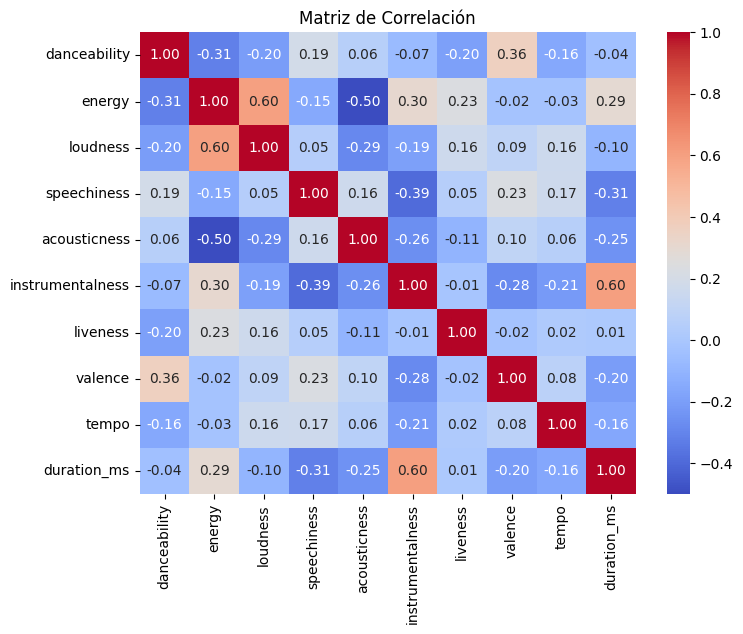

In [53]:
df_num = df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]

correlation_matrix = df_num.corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación')
plt.show()

Observamos: Correlación alta (0,6) entre 'loudness2 y 'energy', también entre 'instrumentalness' y 'duration_ms'. Correlación moderada (-0,5) entre 'energy' y 'acousticness'. Para el resto de carácterísticas la correlación es baja o muy baja.

No vamos a eliminar ninguna columna ya que aunque la correlación es alta entre 0,6 y 0,79 está muy al límite. Esta opción sería más recomendable con valores cercanos al 80%.

Procedemos a codificar el target con la información de kaggle

In [54]:
class_map ={'Dark Trap': 0,
'Underground Rap': 1,
'Trap Metal': 2,
'Emo': 3,
'Rap': 4,
'RnB': 5,
'Pop': 6,
'Hiphop': 7,
'techhouse': 8,
'techno': 9,
'trance': 10,
'psytrance': 11,
'trap': 12,
'dnb': 13,
'hardstyle': 14}

df['genre'] = df['genre'].map(class_map)

In [55]:
df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,Id
0,0.896,0.691,1,-7.403,1,0.3690,0.01180,0.000000,0.0883,0.6650,189.880,152398,4,1,6863
1,0.432,0.962,2,-5.834,1,0.1300,0.00193,0.162000,0.6300,0.1240,138.010,219085,4,10,30452
2,0.686,0.692,0,-5.573,0,0.3230,0.48200,0.000000,0.1690,0.6490,173.780,269357,3,1,8111
3,0.441,0.891,7,-2.873,0,0.0370,0.01770,0.815000,0.1840,0.0353,175.007,319851,4,13,36665
4,0.376,0.876,4,-2.695,0,0.1010,0.03450,0.000000,0.1250,0.2500,202.082,222442,4,0,4428
5,0.730,0.790,9,-4.711,1,0.1670,0.36000,0.000000,0.1150,0.5260,160.116,213107,4,0,1433
6,0.729,0.458,11,-8.681,1,0.1240,0.19400,0.000076,0.0961,0.3170,157.990,280267,4,5,18026
7,0.608,0.789,8,-2.971,1,0.3350,0.00105,0.000031,0.0884,0.3860,172.093,141867,4,7,21115
8,0.607,0.544,11,-7.118,0,0.0246,0.00614,0.967000,0.9290,0.1800,199.960,220455,4,0,3109
9,0.472,0.952,1,-3.271,1,0.1030,0.00021,0.356000,0.4260,0.3730,175.033,260599,4,13,38645


In [56]:
df_encoded = pd.get_dummies(df, columns=['key','mode','time_signature'])


In [57]:
df_encoded.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.896,0.691,-7.403,0.3690,0.01180,0.000000,0.0883,0.6650,189.880,152398,...,False,False,False,False,False,True,False,False,True,False
1,0.432,0.962,-5.834,0.1300,0.00193,0.162000,0.6300,0.1240,138.010,219085,...,False,False,False,False,False,True,False,False,True,False
2,0.686,0.692,-5.573,0.3230,0.48200,0.000000,0.1690,0.6490,173.780,269357,...,False,False,False,False,True,False,False,True,False,False
3,0.441,0.891,-2.873,0.0370,0.01770,0.815000,0.1840,0.0353,175.007,319851,...,False,False,False,False,True,False,False,False,True,False
4,0.376,0.876,-2.695,0.1010,0.03450,0.000000,0.1250,0.2500,202.082,222442,...,False,False,False,False,True,False,False,False,True,False
5,0.730,0.790,-4.711,0.1670,0.36000,0.000000,0.1150,0.5260,160.116,213107,...,False,True,False,False,False,True,False,False,True,False
6,0.729,0.458,-8.681,0.1240,0.19400,0.000076,0.0961,0.3170,157.990,280267,...,False,False,False,True,False,True,False,False,True,False
7,0.608,0.789,-2.971,0.3350,0.00105,0.000031,0.0884,0.3860,172.093,141867,...,True,False,False,False,False,True,False,False,True,False
8,0.607,0.544,-7.118,0.0246,0.00614,0.967000,0.9290,0.1800,199.960,220455,...,False,False,False,True,True,False,False,False,True,False
9,0.472,0.952,-3.271,0.1030,0.00021,0.356000,0.4260,0.3730,175.033,260599,...,False,False,False,False,False,True,False,False,True,False


Escalamos las columnas tempo y duration_ms ya que tienen valores muy superiores al resto.

In [58]:
scaler = MinMaxScaler()
columns_to_scale = ['tempo','duration_ms']
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

print(df_encoded)

       danceability  energy  loudness  speechiness  acousticness  \
0             0.896   0.691    -7.403       0.3690      0.011800   
1             0.432   0.962    -5.834       0.1300      0.001930   
2             0.686   0.692    -5.573       0.3230      0.482000   
3             0.441   0.891    -2.873       0.0370      0.017700   
4             0.376   0.876    -2.695       0.1010      0.034500   
...             ...     ...       ...          ...           ...   
29503         0.384   0.667    -8.126       0.5160      0.062100   
29504         0.855   0.586    -7.134       0.1670      0.200000   
29505         0.464   0.838    -6.762       0.0401      0.000151   
29506         0.683   0.590    -4.949       0.3590      0.215000   
29507         0.868   0.654    -4.832       0.0766      0.208000   

       instrumentalness  liveness  valence     tempo  duration_ms  ...  key_8  \
0                 0.000    0.0883   0.6650  0.812657     0.142879  ...  False   
1                 0.1

In [59]:
df_notarget = df.drop('genre', axis=1,)

In [60]:
pca = PCA(n_components=2)  # Reducción a 2 componentes principales
df_pca = pca.fit_transform(df_notarget)

# Convertir el resultado a un DataFrame para verlo de manera más clara
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['genre'] = df_encoded['genre']

print(df_pca.head())


            PCA1          PCA2  genre
0 -102468.301909  -8885.679412      1
1  -34627.890622  11146.180524     10
2   14393.218434 -13820.290234      1
3   66325.637533  12025.382739     13
4  -32650.859370 -15018.848912      0


In [61]:
umap_model = umap.UMAP(n_components=2)  # Reducción a 2 dimensiones
df_umap = umap_model.fit_transform(df_notarget)

df_umap = pd.DataFrame(df_umap, columns=['UMAP1', 'UMAP2'])

df_umap['genre'] = df_encoded['genre']

print(df_umap.head())

c:\Users\Master\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


       UMAP1      UMAP2  genre
0  -5.890290  -2.716420      1
1   4.516354  10.353480     10
2   7.558990  12.862847      1
3  13.099950   9.682592     13
4   2.458267  10.158159      0


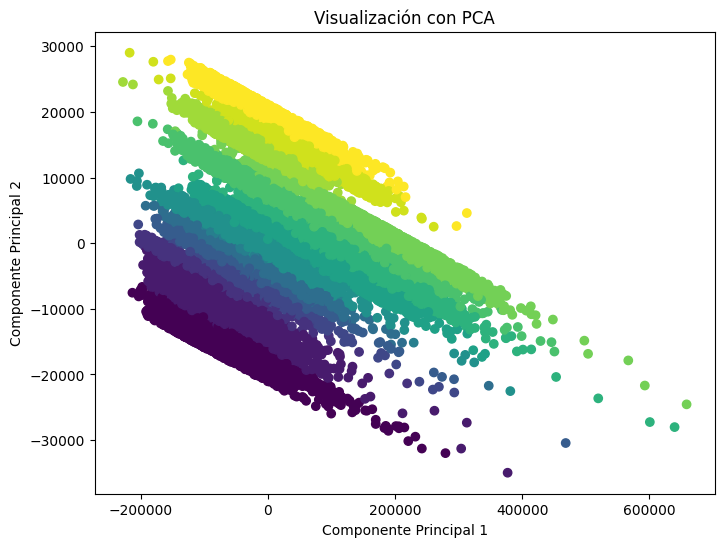

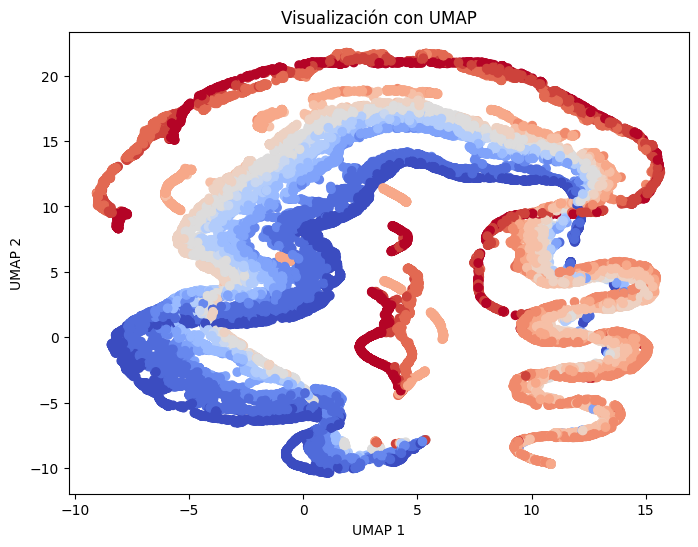

In [62]:
# Visualización de los resultados de PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'],c=df_pca['genre'], cmap='viridis')
plt.title('Visualización con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Visualización de los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(df_umap['UMAP1'], df_umap['UMAP2'],c=df_umap['genre'], cmap='coolwarm')
plt.title('Visualización con UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

COMO SE OBSERVA PCA HA CAPTADO MEJOR LAS DISTINTAS CLASES

AHORA VAMOS A REALIZAR UN ESTUDIO DE CLUSTERING.


PRIMERO VAMOS A SEPARAR COLUMNAS CATEGÓRICAS Y NÚMERICAS

In [68]:
df_num = df_encoded[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
df_cat = df_encoded.drop(['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms'],axis = 1)

In [69]:
df_num.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.896,0.691,-7.403,0.3690,0.01180,0.000000,0.0883,0.6650,0.812657,0.142879
1,0.432,0.962,-5.834,0.1300,0.00193,0.162000,0.6300,0.1240,0.493109,0.218023
2,0.686,0.692,-5.573,0.3230,0.48200,0.000000,0.1690,0.6490,0.713473,0.274671
3,0.441,0.891,-2.873,0.0370,0.01770,0.815000,0.1840,0.0353,0.721032,0.331568
4,0.376,0.876,-2.695,0.1010,0.03450,0.000000,0.1250,0.2500,0.887829,0.221806
5,0.730,0.790,-4.711,0.1670,0.36000,0.000000,0.1150,0.5260,0.629295,0.211287
6,0.729,0.458,-8.681,0.1240,0.19400,0.000076,0.0961,0.3170,0.616197,0.286964
7,0.608,0.789,-2.971,0.3350,0.00105,0.000031,0.0884,0.3860,0.703080,0.131012
8,0.607,0.544,-7.118,0.0246,0.00614,0.967000,0.9290,0.1800,0.874756,0.219567
9,0.472,0.952,-3.271,0.1030,0.00021,0.356000,0.4260,0.3730,0.721192,0.264802


In [70]:
df_cat.head(10)

,genre,Id,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,1,6863,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1,10,30452,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,1,8111,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
3,13,36665,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
4,0,4428,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
5,0,1433,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
6,5,18026,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
7,7,21115,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
8,0,3109,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False
9,13,38645,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False


APLICAMOS K-MEAS PARA LAS COLUMNAS NUMÉRICAS

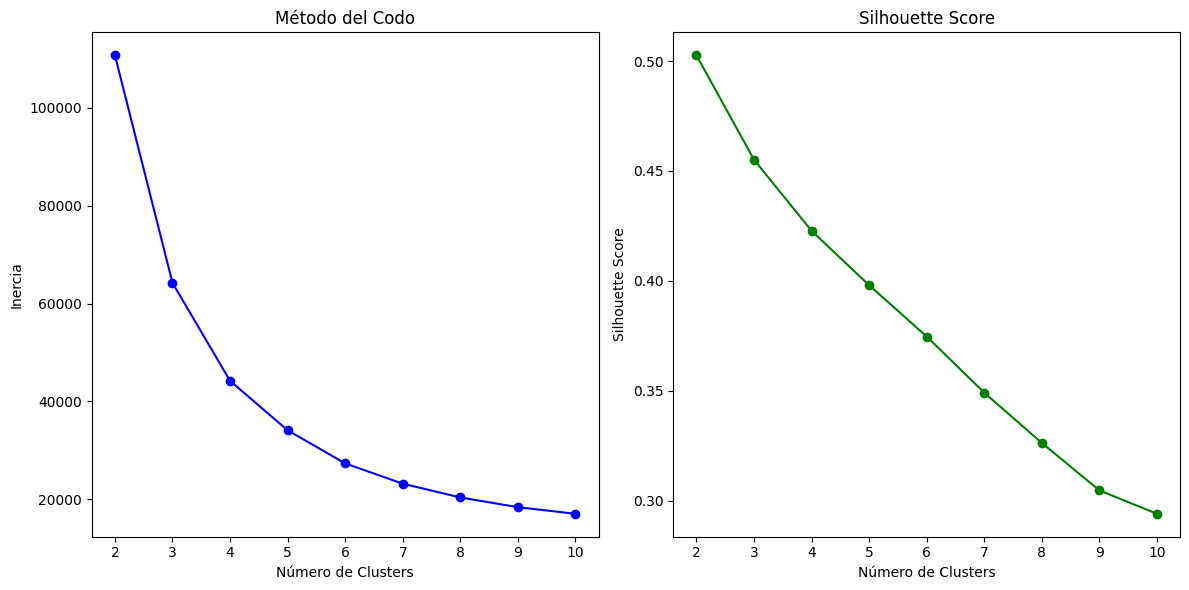

In [ ]:
inertia = []  # Para el elbow
silhouette_scores = []  # Para la silhouette score

# Probar varios valores de K ( 2 a 10 clusters)
K_range = range(2, 11)

for k in K_range:
    # Aplicar KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_num)
    
    # Inercia (Elbow)
    inertia.append(kmeans.inertia_)
    
    # Silhouette score
    score = silhouette_score(df_num, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico del Elbow
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')

# Gráfico de la silhouette score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='g')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Parece que entre 4 y 5 clusters sería el óptimo para las columnas númericas utilizando el elbow method.

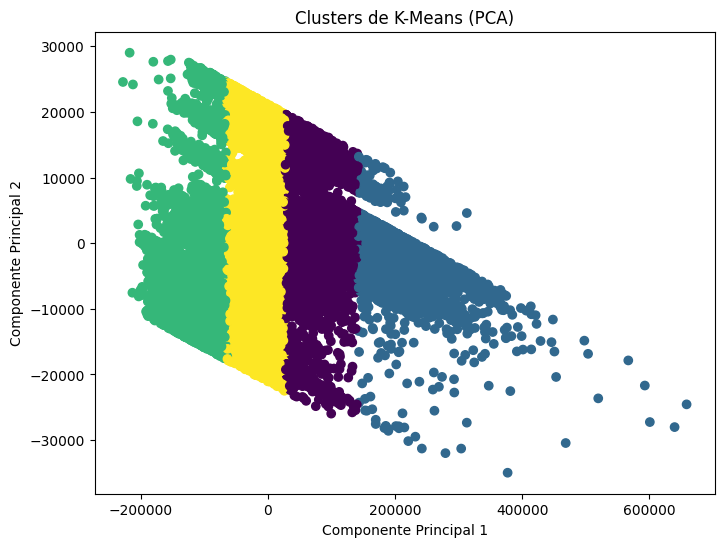

In [115]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_num)

pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_num)

# Graficar los clusters con los resultados de K-Means
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clusters de K-Means (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

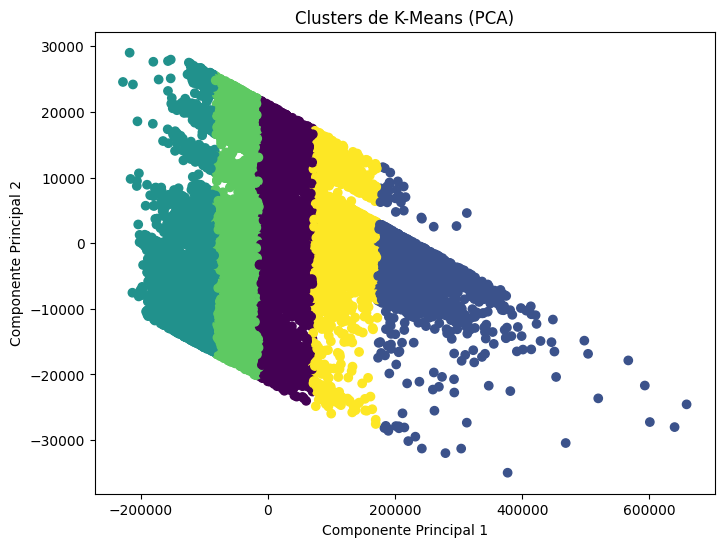

In [114]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_num)

pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_num)

# Graficar los clusters con los resultados de K-Means
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clusters de K-Means (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()